# EXTRAÇÃO E APRESENTAÇÃO DE DADOS DA WEB APLICADOS AS INFRAÇÕES DE TRÂNSITO DO DF, NO ANO DE 2021

## Dados abertos do DETRAN-DF

In [4]:
#Importação das bibliotecas usadas no projeto

import csv
import os
import requests
import pandas as pd
#import mysql.connector
import pyodbc
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
import seaborn as sn
from sklearn.linear_model import LinearRegression


In [5]:
# Declaração das variaveis adotando o padrao para cada tipo de atributo

atributo_string_dummy= 'Não Informado'
atributo_data_dummy= '01/01/1900'
atributo_hora_dummy= '00:00'
atributo_numerico_dummy= 0.0
atributo_int_dummy= 0
atributo_latitude_dummy= -15.794149
atributo_longitude_dummy= -47.883558

# Variavel para guardar o caminho do diretorio onde estão os arquivo

outputDir= 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\'


In [6]:
# Declaração e preenchimento das variaveis que receberá os links dos arquivos

jan= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/b62e0d37-9c34-4ffa-ac41-656e1bceb12c/download/dados-abertos-jan.csv']
fev= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/9f686d18-5457-46ca-b435-698e04ace6f3/download/dados-abertos-fev.csv']
mar= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/8d5de22e-2e00-4ead-a422-6f478988c31e/download/cda-export.csv']
abr= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/e5ecdfc2-87aa-4747-8de5-b35701cf19c7/download/relatorio-de-infracoes-mes-04-2021.csv']
mai= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/6cbacb98-ecec-4b3e-8b1c-ea7bcf8c249f/download/dados-abertos-maio.csv']
jun= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/493e9670-7a2a-42e4-a2a5-04eca058fc61/download/dados-abertos-junho.csv']
jul= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/7592fa7d-865d-4d46-8ebe-8ecf7d40e8f4/download/dados-abertos-julho.csv']
ago= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/e043db37-9754-48f1-b676-fa1542dba8de/download/dados-abertos-agosto-2021.csv']
sete= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/455aa2ff-2a67-446a-b722-4d89efb769b4/download/infracoes-mes-09-2021.csv.csv']
out= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/0e83efe8-e9cb-48e9-a8f2-f1d027fa3f02/download/infracoes-mes-10-2021.csv.csv']
nov= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/c0974b48-5c16-4ca2-a519-feb2275faf07/download/novembro.csv']
dez= ['http://dados.df.gov.br/dataset/3a3b7b40-c715-439d-9dff-f22b47fc5994/resource/2e077b23-363d-4b28-8503-fbd6b1b1818c/download/dezembro.csv']

# Fazendo merge dos arquivos para criar lista completa dos links

listaLink= jan+fev+mar+abr+mai+jun+jul+ago+sete+out+nov+dez

In [7]:
# Função para baixar os arquivos,
# A função usa a biblioteca requests para fazer o download dos arquivos

def baixar_arquivo(url, endereco):
    resposta= requests.get(url)

    # If para capturar e tratar o codigo de retorno da URL
    if resposta.status_code == 200:
        with open(endereco, 'wb') as novoArquivo:
            novoArquivo.write(resposta.content)
        print("Download Finalizado. Arquivo salvo em: {}".format(endereco))
    else:
        resposta.raise_for_status()

In [8]:
# Usando o metodo main só para entrar no loop,
# Este loop faz a interação do arquivo capturando o nome e extensão dentro do diretorio,
# O loop usa a biblioteca OS para este processamento

if __name__ == '__main__':
    
    for arquivo in listaLink:
        baseURL= arquivo     
        capturarNomeArquivo= os.path.splitext(arquivo)[0]
        capturarExtensaoArquivo= os.path.splitext(arquivo)[1]
        capturarNomeArquivo= capturarNomeArquivo+capturarExtensaoArquivo
        nomeArquivo= capturarNomeArquivo.split('/')[-1]
        nomeFormatoArquivo= os.path.join(outputDir, nomeArquivo.format(arquivo))
        
        #Envia o arquivo e o formato do mesmo para a função fazer o download
        baixar_arquivo(baseURL.format(arquivo), nomeFormatoArquivo)
        

Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\dados-abertos-jan.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\dados-abertos-fev.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\cda-export.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\relatorio-de-infracoes-mes-04-2021.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\dados-abertos-maio.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\dados-abertos-junho.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\dados-abertos-julho.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\dados-abertos-agosto-2021.csv
Download Finalizado. Arquivo salvo em: C:\Users\ezequ\Documents\POS\Meu_TCC\dataSets\infracoes-mes-09-2021.csv.csv
Downlo

In [10]:
# Declaração e preenchimento das variaveis de renomeação dos arquivos,
# para renomear os arquivos foi usado a biblioteca OS
# Foi adotado um padrão de nomenclatura alterando só o mês no final do nome

renomear01= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dados-abertos-jan.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202101.csv')
renomear02= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dados-abertos-fev.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202102.csv')
renomear03= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\cda-export.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202103.csv')
renomear04= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\relatorio-de-infracoes-mes-04-2021.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202104.csv')
renomear05= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dados-abertos-maio.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202105.csv')
renomear06= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dados-abertos-junho.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202106.csv')
renomear07= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dados-abertos-julho.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202107.csv')
renomear08= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dados-abertos-agosto-2021.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202108.csv')
renomear09= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\infracoes-mes-09-2021.csv.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202109.csv')
renomear10= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\infracoes-mes-10-2021.csv.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202110.csv')
renomear11= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\novembro.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202111.csv')
renomear12= os.rename('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dezembro.csv', 'C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\dataSets\\dadosAbertosInfracoes202112.csv')


In [25]:
# Declarando variaveis do tipo lista e DataFrame vazias

nomeArquivo=[]
df= pd.DataFrame()

# Loop de interação dentro do diretorio onde estão os arquivos,
# Este faz a leitura dos arquivos do tipo csv,
# Depois faz um merge dos arquivos criando apenas do tipo dataFrame,
# Este loop usa a biblioteca OS e o PANDAS

for i in os.listdir(outputDir):
    frame= pd.read_csv(outputDir+'\\'+i, delimiter=';')
    df= df.append(frame, ignore_index=True)



C:\Users\ezequ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
# Inserindo uma coluna com condição sobre a natureza da infração
# Essa coluna servirá para o merge dos Data Frames

df.loc[df['grav_tipo']== 'Gravíssima', 'FK_Natureza_Infracao']= 1
df.loc[df['grav_tipo']== 'Grave', 'FK_Natureza_Infracao']= 2
df.loc[df['grav_tipo']== 'Média', 'FK_Natureza_Infracao']= 3
df.loc[df['grav_tipo']== 'Leve', 'FK_Natureza_Infracao']= 4


In [27]:
# Renomeando as colunas do dataFrame usando a bilbioteca PANDAS

df= df.rename(columns={'auinf_local_rodovia':'nome_rodovia'
                       ,'cometimento':'data_infracao'
                       ,'hora_cometimento':'hora_infracao'
                       ,'auinf_local_km':'km_rodovia'
                       ,'auinf_local_referencia':'referencia_local'
                       ,'auinf_local_complemento':'complemento_local'
                       ,'auinf_local_latitude':'latitude_local_infracao'
                       ,'auinf_local_longitude':'longitude_local_infracao'
                       ,'grav_tipo':'natureza_infracao'})


In [28]:
# Tratando os valores nulos com os valores das variaveis ja declaradas,
# A biblioteca PANDAS está sendo usada nesse tratamento

df.update(df['tipo_infracao'].fillna(atributo_string_dummy))
df.update(df['descricao'].fillna(atributo_string_dummy))
df.update(df['tipo_infrator'].fillna(atributo_string_dummy))
df.update(df['tipo_veiculo'].fillna(atributo_string_dummy))
df.update(df['data_infracao'].fillna(atributo_data_dummy))
df.update(df['hora_infracao'].fillna(atributo_hora_dummy))
df.update(df['nome_rodovia'].fillna(atributo_string_dummy))
df.update(df['km_rodovia'].fillna(atributo_int_dummy))
df.update(df['referencia_local'].fillna(atributo_string_dummy))
df.update(df['complemento_local'].fillna(atributo_string_dummy))
df.update(df['latitude_local_infracao'].fillna(atributo_latitude_dummy))
df.update(df['longitude_local_infracao'].fillna(atributo_longitude_dummy))
df.update(df['natureza_infracao'].fillna(atributo_string_dummy))


In [33]:
# Fazendo a leitura do arquivo de tabela de multas
# Alterando a coluna que irá fazer join com o outro dataset

dfV= pd.read_excel('C:\\Users\\ezequ\\Documents\\POS\\Meu_TCC\\ValoresMultasDF.xlsx')
dfV= dfV.rename(columns={'FK_Naturez_Infracao':'FK_Natureza_Infracao'
                        ,'Naturez_Infracao':'Natureza_Infracao'})


In [34]:
# Unindo os 12 arquivos de infrações do ano com o arquivo de tabela de multas

df2= pd.merge(df, dfV, on='FK_Natureza_Infracao')


In [35]:
# Deletando o caracter especial '-' da coluna

df2['tipo_infracao']= df2['tipo_infracao'].str.replace('-', '')


In [36]:
# Retirando os espaços da coluna e colocando os dados em caixa alta

df2['tipo_veiculo']= df['tipo_veiculo'].str.replace(' ','')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.upper()
df2['tipo_infrator']= df2['tipo_infrator'].str.upper()


In [37]:
# Tratando os dados para uma melhor padronização
# Isso será melhor na leitura dos mesmo

df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('CAMINHONET','CAMINHONETE')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('Caminhonete','CAMINHONETE')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('Camioneta','CAMINHONETE')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('CAMIONETA','CAMINHONETE')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('CAMINHONETEE','CAMINHONETE')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MOTOCICLET','MOTOCICLETA')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('Motocicleta','MOTOCICLETA')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('AUTOMÓVEL','AUTOMOVEL')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MOTOCICLETAA','MOTOCICLETA')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('UTILITÁRIO','UTILITARIO')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('ÔNIBUS','ONIBUS')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('CAMINHÃO','CAMINHAO')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('CAMINHÃOTRATOR','CAMINHAO')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('CAMINHAOTRATOR','CAMINHAO')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('C.TRATOR','CAMINHAO')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MICROONIBU','MICRO-ONIBUS')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MICROÔNIBUS','MICRO-ONIBUS')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('S.REBOQUE','SEMI-REBOQUE')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MOTORCASA','MOTOR-CASA')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('TRRODAS','TRATOR')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('TRMISTO','TRATOR')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MICROONIBUSSSS','MICRO-ONIBUS')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MICROONIBUSSSSS','MICRO-ONIBUS')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MICRO-ONIBUSSSSSS','MICRO-ONIBUS')
df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('MICRO-ONIBUSSSSS','MICRO-ONIBUS')


C:\Users\ezequ\AppData\Local\Temp/ipykernel_15564/3478631065.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('C.TRATOR','CAMINHAO')
C:\Users\ezequ\AppData\Local\Temp/ipykernel_15564/3478631065.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['tipo_veiculo']= df2['tipo_veiculo'].str.replace('S.REBOQUE','SEMI-REBOQUE')


In [38]:
# Ordenando os dados pela coluna
# Essa ordenação é melhor para fazer as analises

df2= df2.sort_values(by=['tipo_veiculo'])


### Iniciando o Modelo de Regressão Linear

In [40]:
# modelo de teste para verificar os dados

x= round(df2['FK_Natureza_Infracao'],0)
y= round(df2['Valor_Multa'],0)
x_cons= sm.add_constant(x)
resultado= sm.OLS(y, x_cons).fit()
resultado.summary()
resultado.predict(x_cons)

C:\Users\ezequ\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0         136.42626
650283    136.42626
650284    136.42626
650285    136.42626
650288    136.42626
            ...    
235269    136.42626
664571    136.42626
90947     136.42626
546467    136.42626
438338    136.42626
Length: 1070670, dtype: float64

In [41]:
# Criação do modelo real de regressão linear 

# Separando as colunas que será usada no modelo
x= round(df2['FK_Natureza_Infracao'],0)
y= round(df2['Valor_Multa'],0)

# Criando um data frame vazio e inserindo as colunas ja separadas dentro dele
dfPA= pd.DataFrame()
dfPA['x'] = round(x,0)
dfPA['y'] = round(y,0)
x_v = dfPA[['x']]
y_v = dfPA[['y']]

# Inserindo o algoritimo do modelo em uma variavel
modelo = LinearRegression()

# Alterando a variavel x para um array e treinando o modelo
x_v = np.array(x_v).reshape(-1, 1)
modelo.fit(x_v, y_v)

# Verificando a acuracia do modelo
acuracia = modelo.score(x_v, y_v)
print("Acuracia = {:0.2f}".format(acuracia))


Acuracia = 0.95


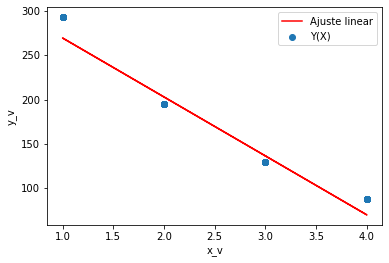

In [42]:
# Criando as variaveis com os coeficientes de plotagem da reta
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_
reta = coef_angular*x_v+coef_linear

# Plotando os dados do modelo no grafico 
plt.scatter(x_v,y_v,label='Y(X)');
plt.plot(x_v,reta,label='Ajuste linear',color='red');
plt.xlabel('x_v');
plt.ylabel('y_v');
plt.legend();


In [43]:
# Mostrar os valores de erro do modelo e a distância enre a reta

erro = mean_absolute_error(y_v,reta)
entreReta = np.sqrt(mean_squared_error(y_v,reta))
print("Probabilidade de erro = {:0.2f}".format(erro))
print("Distância da reta = {:0.2f}".format(entreReta))


Probabilidade de erro = 9.92
Distância da reta = 11.53


#### Terminando o linear

### Iniciando o modelo Naive Bayes

In [50]:
# Separando os atributos que serão usados no modelo:
# tipo_infrator, tipo_veiculo e natureza_infracao

df3= df2.iloc[:,[2,3,14]].values
x_infracao= df3[:,0:2] # Preditora
y_infracao= df3[:,2] # Classe


In [51]:
# Criação do enconder para vincular um numero unico para cada atributo

encoderTipoInfrator= LabelEncoder()
encoderTipoVeiculo= LabelEncoder()
encoderNaturezaInfracao= LabelEncoder()

# Vinculando o encoder ao seu atributo especifico
x_infracao[:,0]= encoderTipoInfrator.fit_transform(x_infracao[:,0])
x_infracao[:,1]= encoderTipoVeiculo.fit_transform(x_infracao[:,1])


In [52]:
# Inserindo o algoritimo do modelo em uma variavel 
infracaoNB= GaussianNB()

# Fazendo o treinamento do modelo
infracaoNB.fit(x_infracao, y_infracao)


GaussianNB()

In [53]:
# Verificando a predição do modelo
# Condutor [0], Automovel [0]
# Condutor [0], Motocicleta [11]

prev= infracaoNB.predict([[0,0],[0,11]])
prev


array(['Leve', 'Leve'], dtype='<U10')

In [24]:
#Verificando as classes dos dados
infracaoNB.classes_

array(['Grave', 'Gravíssima', 'Leve', 'Média'], dtype='<U10')

In [25]:
# Contando os dados por classe
infracaoNB.class_count_

array([ 94385.,  86377., 181130., 708778.])

In [26]:
# Percentual de dados em cada classe
infracaoNB.class_prior_

array([0.08815508, 0.08067565, 0.16917444, 0.66199483])

#### Terminando o navie bayes

### Iniciando Modelo de Regressão Logisitca

In [58]:
# Inserindo mais um atributo no Data Frame para ser usado como target no modelo a seguir

df2.loc[df2['FK_Natureza_Infracao']== 1, 'flagNaturezaPrevisao']= 1
df2.loc[df2['FK_Natureza_Infracao']== 2, 'flagNaturezaPrevisao']= 0
df2.loc[df2['FK_Natureza_Infracao']== 3, 'flagNaturezaPrevisao']= 0
df2.loc[df2['FK_Natureza_Infracao']== 4, 'flagNaturezaPrevisao']= 0


In [59]:
# Separando os atributos que serão usados no modelo:
# tipo_infracao, tipo_infrator, tipo_veiculo, natureza_infracao e flagNaturezaPrevisao

df4= df2.iloc[:,[0,2,3,12,17]].values
X= df4[:,0:4] # Preditora
y= df4[:,4] # Classe

# Alterando o tipo de dado da classe para inteiro
y= y.astype(int)


In [60]:
# Criação do enconder para vincular um numero unico para cada atributo

encoderTipoInfracao= LabelEncoder()
encoderTipoInfrator= LabelEncoder()
encoderTipoVeiculo= LabelEncoder()
encoderNaturezaInfracao= LabelEncoder()

# Vinculando o encoder ao seu atributo especifico
X[:,0]= encoderTipoInfracao.fit_transform(X[:,0])
X[:,1]= encoderTipoInfrator.fit_transform(X[:,1])
X[:,2]= encoderTipoVeiculo.fit_transform(X[:,2])
X[:,3]= encoderNaturezaInfracao.fit_transform(X[:,3])


In [61]:
# Separando 25% dos dados para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)


In [62]:
# Inserindo o algoritimo do modelo em uma variavel 
# Fazendo o treinamento do modelo

logicaReg= LogisticRegression()
logicaReg.fit(X_train, y_train)
predY= logicaReg.predict(X_test)


<AxesSubplot:xlabel='Predicao', ylabel='Atual'>

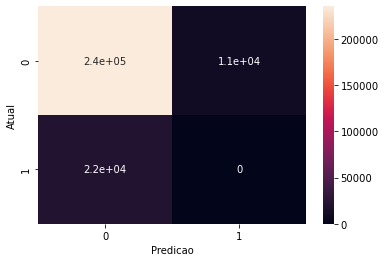

In [63]:
# Gerando a matriz de confusão após a predição do modelo ser slava em variavel

matrixConfusao= pd.crosstab(y_test, predY, rownames=['Atual'], colnames=['Predicao'])
sn.heatmap(matrixConfusao, annot=True)

In [137]:
# Verificando a acuracia do modelo

print('Acuracy: ', metrics.accuracy_score(y_test, predY))
plt.show()

Acuracy:  0.8782783149274475


In [ ]:
#df2['tipo_infracao'].tail(1000000)

In [64]:
#df2['tipo_infrator'].tail(1000000)

In [65]:
#df2['tipo_veiculo'].tail(1000000)

In [66]:
#df2['natureza_infracao'].tail(1000000)

In [67]:
#df2['flagNaturezaPrevisao'].tail(1000000)

In [69]:
#dfV= df2.query('natureza_infracao == "Gravíssima"')
#for i in X[0:1000000]: print(i)
#X[-1]

In [70]:
# Após a analise acima para verificar os encoders dos dados
# inserir em um dicionario os codigos para o modelo prever
#Acima da maxima 20%[241] Condutor[0] Utilitario[22] média[3]

testePrevisao= {'tipoInfracao':241, 'condutor':0, 'utilitario':22, 'media':3}
dfTP= pd.DataFrame(data= testePrevisao, index=[0])
result= logicaReg.predict(dfTP)


In [71]:
# Depois de executar o modelo verificar o resultado
# 1 Possibilidade de Gravissima 0 Não a possibilidade
print(result)

[0]


#### Terminando Regressão Logistica

In [16]:
'''
    Criação da string de conexão.
    Para inserir os dados no banco a maquina do docker ja deve estar executando
    com o servidor do sql server e a tabela criada no banco
'''

connection = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                            'Server=localhost,1433;'
                            'Database=INFRACAO;'
                            'UID=sa;'
                            'PWD=Password@01')

cursor = connection.cursor()

# Loop de interação com o banco de dados,
# O loop insere em uma tabela já criada no banco de daos,
# A inserção acontece linha a linha

for index, row in df.iterrows():
    cursor.execute("INSERT INTO  dbo.DADOS_INFRACAO(tipo_infracao,descricao,tipo_infrator,tipo_veiculo,data_infracao,hora_infracao,nome_rodovia,km_rodovia,referencia_local,complemento_local,latitude_local_infracao,longitude_local_infracao,natureza_infracao) VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",
                    row.tipo_infracao,
                    row.descricao,
                    row.tipo_infrator,
                    row.tipo_veiculo,
                    row.data_infracao,
                    row.hora_infracao,
                    row.nome_rodovia,
                    row.km_rodovia,
                    row.referencia_local,
                    row.complemento_local,
                    row.latitude_local_infracao,
                    row.longitude_local_infracao,
                    row.natureza_infracao)

    #Comitando e fechando a conexão
connection.commit()
cursor.close()


### FIM